In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cricket

In [10]:
# List of dataframes from the webpage
sehwag = pd.read_html("https://stats.espncricinfo.com/ci/engine/player/35263.html?class=2;template=results;type=batting;view=innings")

sehwag = sehwag[3]
sehwag = sehwag[sehwag["Runs"] != "DNB"]
sehwag = sehwag[sehwag["Runs"] != "TDNB"]
sehwag["Runs"] = pd.to_numeric(sehwag["Runs"].apply(lambda row: ''.join(row.split("*"))))

In [61]:
dravid_url = "https://stats.espncricinfo.com/ci/engine/player/28114.html?class=2;template=results;type=batting;view=innings"
dravid = pd.read_html(dravid_url)[3]
dravid = dravid[dravid["Runs"] != "DNB"]
dravid = dravid[dravid["Runs"] != "TDNB"]
dravid["Runs"] = pd.to_numeric(dravid["Runs"].apply(lambda row: ''.join(row.split("*"))))

In [11]:
sehwag.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
2,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
3,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
5,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
6,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731


In [23]:
len(sehwag)

245

In [63]:
len(dravid)

318

## Population mean and population std dev

In [12]:
mu_sehwag = sehwag["Runs"].mean().round(2)
print("Sehwag population mean:", mu_sehwag)

Sehwag population mean: 33.77


In [13]:
sigma_sehwag = sehwag["Runs"].std().round(2)
print("Sehwag population std dev:", sigma_sehwag)

Sehwag population std dev: 34.81


In [62]:
mu_dravid = dravid["Runs"].mean().round(2)
print("Dravid population mean:", mu_dravid)
sigma_dravid = dravid["Runs"].std().round(2)
print("Dravid population std dev:", sigma_dravid)

Dravid population mean: 34.24
Dravid population std dev: 29.68


## Sample mean

In [31]:
num_samples = 10
sehwag_samples = sehwag["Runs"].sample(num_samples)
print("Sample mean:", sehwag_samples.mean())

Sample mean: 24.8


In [32]:
sehwag_samples

210     6
42     25
176    43
28     21
248    34
96     17
165    12
41     13
110    29
131    48
Name: Runs, dtype: int64

## Sample mean trend

Text(0, 0.5, 'Sample mean')

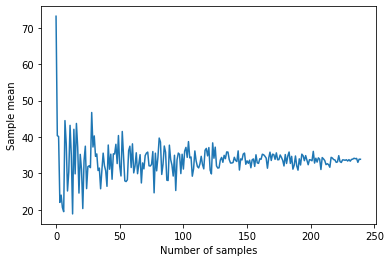

In [29]:
# How does this sample mean change if I increase number of samples
sample_mean_trend = []
for num_samples in range(5, len(sehwag)):
    sample = sehwag["Runs"].sample(num_samples)
    sample_mean = np.mean(sample)
    sample_mean_trend.append(sample_mean)
plt.plot(sample_mean_trend)
plt.xlabel("Number of samples")
plt.ylabel("Sample mean")

Text(0, 0.5, 'Sample mean')

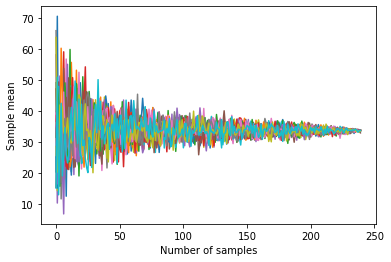

In [30]:
sample_mean_trend = []
for person in range(20):
    for num_samples in range(5, len(sehwag)):
        sample = sehwag["Runs"].sample(num_samples)
        sample_mean = np.mean(sample)
        sample_mean_trend.append(sample_mean)
    plt.plot(sample_mean_trend)
    sample_mean_trend = []
plt.xlabel("Number of samples")
plt.ylabel("Sample mean")

## Collect sample means

In [60]:
num_samples = 200
collect_sample_means = []
for person in range(200):
    sample_mean = sehwag["Runs"].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)
print("Mean of sample means:", np.mean(collect_sample_means).round(2))
print("Population mean:", mu_sehwag)
print("Std Dev of sample means", np.std(collect_sample_means).round(2))
print("Population std dev:", sigma_sehwag)
# sns.histplot(collect_sample_means, bins=30)

Mean of sample means: 33.78
Population mean: 33.77
Std Dev of sample means 1.01
Population std dev: 34.81


## Outlier Detection

In [72]:
p_25 = sehwag["Runs"].quantile(0.25) # np.percentile(25)
p_75 = sehwag["Runs"].quantile(0.75)
print(p_25, p_75)
iqr = p_75 - p_25
lower = p_25 - 1.5*iqr
upper = p_75 + 1.5*iqr
print(lower, upper)
sehwag_iqr = sehwag[(sehwag["Runs"] > lower) & (sehwag["Runs"] < upper)] # Outlier removal
print(100*len(sehwag_iqr) / len(sehwag))


8.0 46.0
-49.0 103.0
94.28571428571429


<AxesSubplot:>

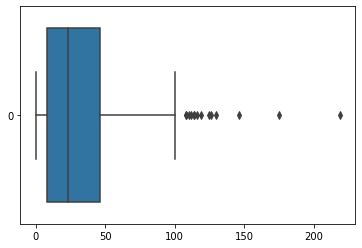

In [66]:
sns.boxplot(data=sehwag["Runs"], orient="h")

In [73]:
p_25 = dravid["Runs"].quantile(0.25)
p_75 = dravid["Runs"].quantile(0.75)

iqr = p_75 - p_25 
lower = p_25 - 1.5*iqr
upper = p_75 + 1.5*iqr
print(lower, upper)
dravid_iqr = dravid[(dravid["Runs"] > lower) & (dravid["Runs"] < upper)] # Removed outliers
print(100*len(dravid_iqr)/len(dravid))

-56.0 120.0
99.05660377358491


<AxesSubplot:>

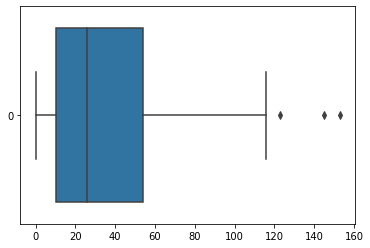

In [67]:
sns.boxplot(data=dravid["Runs"], orient="h")

In [74]:
from scipy.stats import norm

In [79]:
1 - norm.cdf(2)

0.02275013194817921

In [77]:
norm.cdf(1) - norm.cdf(-1)

0.6826894921370859

In [76]:
norm.cdf(2) - norm.cdf(-2)

0.9544997361036416

In [78]:
norm.cdf(3) - norm.cdf(-3)

0.9973002039367398